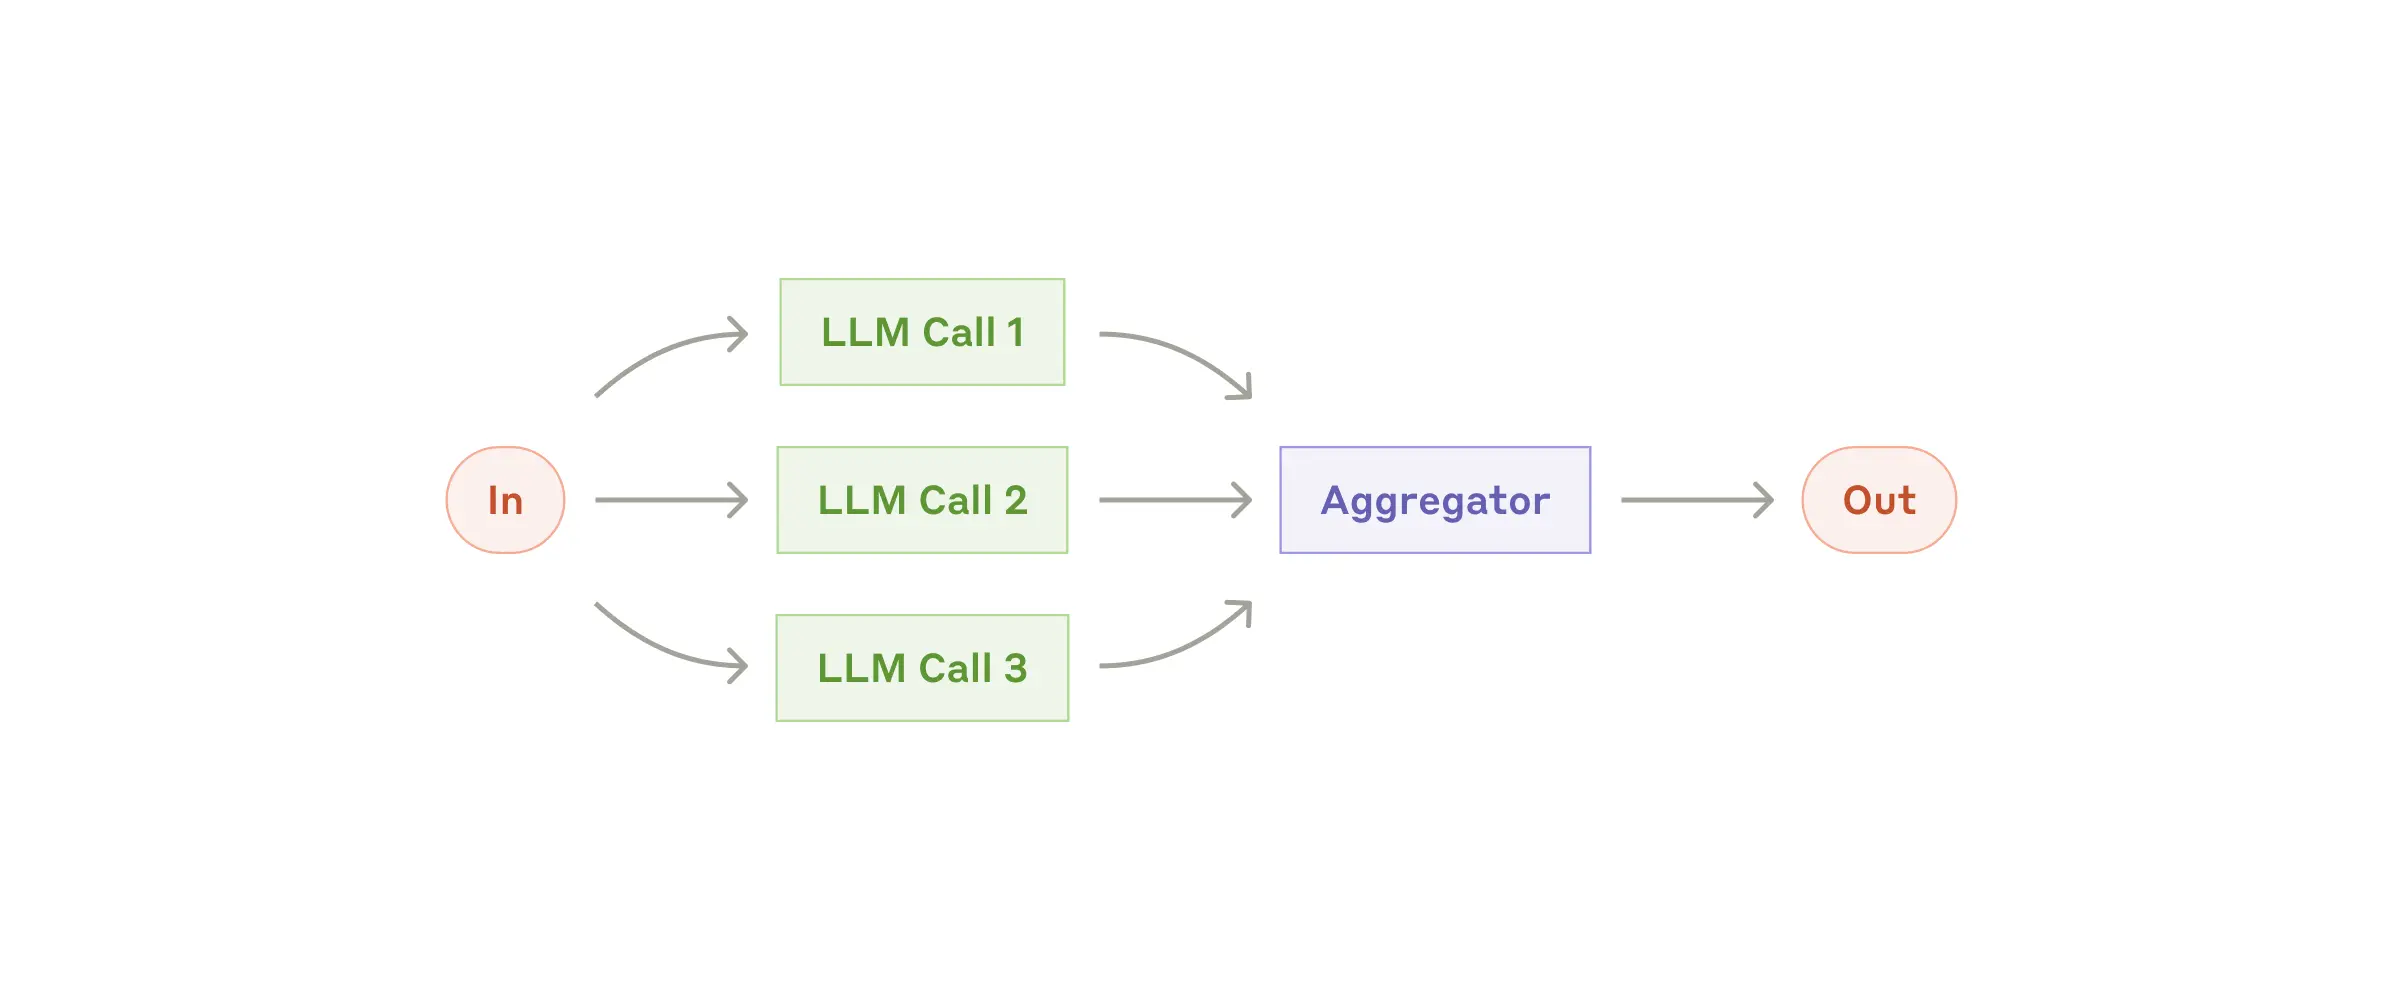

In [1]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")
    else:
        print(f"{var} already set")
        
_set_env("OPENAI_API_KEY")

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

OPENAI_API_KEY already set


In [2]:
from typing import TypedDict

class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str

In [8]:
#Nodes

def generate_joke(state: State):
    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}

def generate_story(state: State):
    msg = llm.invoke(f"Write a short story about {state['topic']}")
    return {"story": msg.content}

def generate_poem(state: State):
    msg = llm.invoke(f"Write a short poem about {state['topic']}")
    return {"poem": msg.content}

def aggregator(state: State):
    combined_output = f"Here is the combined output for {state['topic']}:\n\n"
    combined_output += f"Joke:\n{state['joke']}\n\n"
    combined_output += f"Story:\n{state['story']}\n\n"
    combined_output += f"Poem:\n{state['poem']}\n\n"
    return {"combined_output": combined_output}

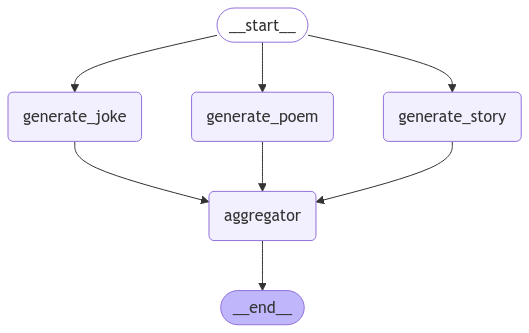

In [9]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

workflow = StateGraph(State)

workflow.add_node('generate_joke', generate_joke)
workflow.add_node('generate_story', generate_story)
workflow.add_node('generate_poem', generate_poem)
workflow.add_node('aggregator', aggregator)

workflow.add_edge(START, 'generate_joke')
workflow.add_edge(START, 'generate_story')
workflow.add_edge(START, 'generate_poem')
workflow.add_edge('generate_joke', 'aggregator')
workflow.add_edge('generate_story', 'aggregator')
workflow.add_edge('generate_poem', 'aggregator')
workflow.add_edge('aggregator', END)

chain = workflow.compile()

display(Image(chain.get_graph().draw_mermaid_png()))

In [10]:
state = chain.invoke({"topic": "Narendra Modi"})
print(state["combined_output"])

Here is the combined output for Narendra Modi:

Joke:
Why did Narendra Modi bring a ladder to the rally? 

Because he wanted to take his speeches to the next level!

Story:
In the heart of Varanasi, where the Ganges flows with stories of ancient civilizations, a young Narendra Modi stood on the ghats observing the evening aarti. The flickering flames reflected not only on the water but also in his eyes—those of a dreamer. 

As a boy, Modi was often found wandering the narrow lanes, intrigued by the old tales shared by sages and saints. He lived in a modest home, where his father sold tea, and it was amidst that humble life that he developed an insatiable curiosity about the world around him. He learned the value of hard work early on, serving customers with a smile, each cup of tea brewed with the hope of a brighter future.

One chilly afternoon, as he sat on the banks of the river, Modi overheard a group of men discussing the plight of farmers. Their faces were shadowed with worry, th